# Importing the necessary libraries

In [ ]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset

In [ ]:
df = pd.read_csv("2020.csv")
df.head()

,Unnamed: 0,formFactor,floorArea,widthToDepth,unitwwrNorth,unitwwrWest,unitwwrSouth,unitwwrEast,skyExposureNorth,skyExposureWest,...,Infiltration,boilerEfficiency,Annual Sum Heating Degree Days,Annual Average Dry Bulb Temperature,Annual Average of Global Horizontal Irradiation,0.0,1.0,2.0,heatingEndUse,IOD
0,0,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,...,0.0,0.85,2499.475,13.373196,197.884247,1,0,0,80.050961,0.075296
1,1,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,56.07,0.00,...,0.0,0.85,2499.475,13.373196,197.884247,1,0,0,72.587617,0.023298
2,2,0.223,148.2,1.117845,0.14,0.14,0.14,0.00,66.28,52.28,...,0.0,0.85,2499.475,13.373196,197.884247,1,0,0,47.525809,0.062990
3,3,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,...,0.0,0.85,2499.475,13.373196,197.884247,0,1,0,36.484001,0.437458
4,4,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,63.25,0.00,...,0.0,0.85,2499.475,13.373196,197.884247,0,1,0,46.028985,0.252456


# Data preprocessing

We can drop the index column, because we already have one.

In [ ]:
df = pd.read_csv("2020.csv", index_col=0)
df.head()

,formFactor,floorArea,widthToDepth,unitwwrNorth,unitwwrWest,unitwwrSouth,unitwwrEast,skyExposureNorth,skyExposureWest,skyExposureSouth,...,Infiltration,boilerEfficiency,Annual Sum Heating Degree Days,Annual Average Dry Bulb Temperature,Annual Average of Global Horizontal Irradiation,0.0,1.0,2.0,heatingEndUse,IOD
0,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,76.45,...,0.0,0.85,2499.475,13.373196,197.884247,1,0,0,80.050961,0.075296
1,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,56.07,0.00,0.00,...,0.0,0.85,2499.475,13.373196,197.884247,1,0,0,72.587617,0.023298
2,0.223,148.2,1.117845,0.14,0.14,0.14,0.00,66.28,52.28,51.18,...,0.0,0.85,2499.475,13.373196,197.884247,1,0,0,47.525809,0.062990
3,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,82.28,...,0.0,0.85,2499.475,13.373196,197.884247,0,1,0,36.484001,0.437458
4,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,63.25,0.00,0.00,...,0.0,0.85,2499.475,13.373196,197.884247,0,1,0,46.028985,0.252456


In [ ]:
df["Infiltration"].values

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Is there any Infiltration value that is not 0?
df["Infiltration"][df["Infiltration"].values != 0.]

Series([], Name: Infiltration, dtype: float64)

As we can see, "Infiltration" is a column with all values 0. We can drop it because the model can not learn anything from it. Similarly, we can drop "Annual Sum Heating Degree Days", "Annual Average Dry Bulb Temperature", and "Annual Average of Global Horizontal Irradiation" columns.

In [ ]:
df = df.drop(columns="Infiltration")
df.head()

,formFactor,floorArea,widthToDepth,unitwwrNorth,unitwwrWest,unitwwrSouth,unitwwrEast,skyExposureNorth,skyExposureWest,skyExposureSouth,...,VTWindow,boilerEfficiency,Annual Sum Heating Degree Days,Annual Average Dry Bulb Temperature,Annual Average of Global Horizontal Irradiation,0.0,1.0,2.0,heatingEndUse,IOD
0,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,76.45,...,0.57,0.85,2499.475,13.373196,197.884247,1,0,0,80.050961,0.075296
1,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,56.07,0.00,0.00,...,0.57,0.85,2499.475,13.373196,197.884247,1,0,0,72.587617,0.023298
2,0.223,148.2,1.117845,0.14,0.14,0.14,0.00,66.28,52.28,51.18,...,0.57,0.85,2499.475,13.373196,197.884247,1,0,0,47.525809,0.062990
3,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,82.28,...,0.57,0.85,2499.475,13.373196,197.884247,0,1,0,36.484001,0.437458
4,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,63.25,0.00,0.00,...,0.57,0.85,2499.475,13.373196,197.884247,0,1,0,46.028985,0.252456


In [ ]:
df["Annual Sum Heating Degree Days"].values

array([2499.475, 2499.475, 2499.475, ..., 2499.475, 2499.475, 2499.475])

In [ ]:
# Is there any Annual Sum Heating Degree Days value that is not 2499.475?
df["Annual Sum Heating Degree Days"][df["Annual Sum Heating Degree Days"].values != 2499.475]

Series([], Name: Annual Sum Heating Degree Days, dtype: float64)

In [ ]:
df = df.drop(columns="Annual Sum Heating Degree Days")
df.head()

,formFactor,floorArea,widthToDepth,unitwwrNorth,unitwwrWest,unitwwrSouth,unitwwrEast,skyExposureNorth,skyExposureWest,skyExposureSouth,...,SHGCWindow,VTWindow,boilerEfficiency,Annual Average Dry Bulb Temperature,Annual Average of Global Horizontal Irradiation,0.0,1.0,2.0,heatingEndUse,IOD
0,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,76.45,...,0.73,0.57,0.85,13.373196,197.884247,1,0,0,80.050961,0.075296
1,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,56.07,0.00,0.00,...,0.73,0.57,0.85,13.373196,197.884247,1,0,0,72.587617,0.023298
2,0.223,148.2,1.117845,0.14,0.14,0.14,0.00,66.28,52.28,51.18,...,0.73,0.57,0.85,13.373196,197.884247,1,0,0,47.525809,0.062990
3,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,82.28,...,0.73,0.57,0.85,13.373196,197.884247,0,1,0,36.484001,0.437458
4,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,63.25,0.00,0.00,...,0.73,0.57,0.85,13.373196,197.884247,0,1,0,46.028985,0.252456


In [ ]:
df["Annual Average Dry Bulb Temperature"].values

array([13.37319635, 13.37319635, 13.37319635, ..., 13.37319635,
       13.37319635, 13.37319635])

In [ ]:
# Is there any Annual Average Dry Bulb Temperature value that is not 13.37319635?
df["Annual Average Dry Bulb Temperature"][df["Annual Average Dry Bulb Temperature"].values != 13.37319635]

Series([], Name: Annual Average Dry Bulb Temperature, dtype: float64)

In [ ]:
df = df.drop(columns="Annual Average Dry Bulb Temperature")
df.head()

,formFactor,floorArea,widthToDepth,unitwwrNorth,unitwwrWest,unitwwrSouth,unitwwrEast,skyExposureNorth,skyExposureWest,skyExposureSouth,...,uGroundFloor,SHGCWindow,VTWindow,boilerEfficiency,Annual Average of Global Horizontal Irradiation,0.0,1.0,2.0,heatingEndUse,IOD
0,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,76.45,...,1.403814,0.73,0.57,0.85,197.884247,1,0,0,80.050961,0.075296
1,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,56.07,0.00,0.00,...,1.403814,0.73,0.57,0.85,197.884247,1,0,0,72.587617,0.023298
2,0.223,148.2,1.117845,0.14,0.14,0.14,0.00,66.28,52.28,51.18,...,1.403814,0.73,0.57,0.85,197.884247,1,0,0,47.525809,0.062990
3,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,82.28,...,1.403814,0.73,0.57,0.85,197.884247,0,1,0,36.484001,0.437458
4,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,63.25,0.00,0.00,...,1.403814,0.73,0.57,0.85,197.884247,0,1,0,46.028985,0.252456


In [ ]:
df["Annual Average of Global Horizontal Irradiation"].values

array([197.8842466, 197.8842466, 197.8842466, ..., 197.8842466,
       197.8842466, 197.8842466])

In [ ]:
# Is there any Annual Average of Global Horizontal Irradiation value that is not 197.8842466?
df["Annual Average of Global Horizontal Irradiation"][df["Annual Average of Global Horizontal Irradiation"].values != 197.8842466]

Series([], Name: Annual Average of Global Horizontal Irradiation, dtype: float64)

In [ ]:
df = df.drop(columns="Annual Average of Global Horizontal Irradiation")
df.head()

,formFactor,floorArea,widthToDepth,unitwwrNorth,unitwwrWest,unitwwrSouth,unitwwrEast,skyExposureNorth,skyExposureWest,skyExposureSouth,...,uRoof,uGroundFloor,SHGCWindow,VTWindow,boilerEfficiency,0.0,1.0,2.0,heatingEndUse,IOD
0,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,76.45,...,0.596,1.403814,0.73,0.57,0.85,1,0,0,80.050961,0.075296
1,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,56.07,0.00,0.00,...,0.596,1.403814,0.73,0.57,0.85,1,0,0,72.587617,0.023298
2,0.223,148.2,1.117845,0.14,0.14,0.14,0.00,66.28,52.28,51.18,...,0.596,1.403814,0.73,0.57,0.85,1,0,0,47.525809,0.062990
3,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,82.28,...,0.596,1.403814,0.73,0.57,0.85,0,1,0,36.484001,0.437458
4,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,63.25,0.00,0.00,...,0.596,1.403814,0.73,0.57,0.85,0,1,0,46.028985,0.252456


As we can see, we have already-one-hot-encoded columns named as "0.0", "1.0", "2.0". We should treat them separately from the numeric data.

In [ ]:
df_ohe = df[["0.0", "1.0", "2.0"]]
df_ohe.head()

,0.0,1.0,2.0
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [ ]:
df_numerical = df.drop(columns=["0.0", "1.0", "2.0"])
df_numerical.head()

,formFactor,floorArea,widthToDepth,unitwwrNorth,unitwwrWest,unitwwrSouth,unitwwrEast,skyExposureNorth,skyExposureWest,skyExposureSouth,...,equipDens,uWall,uWindow,uRoof,uGroundFloor,SHGCWindow,VTWindow,boilerEfficiency,heatingEndUse,IOD
0,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,76.45,...,6.730,0.867,1.87,0.596,1.403814,0.73,0.57,0.85,80.050961,0.075296
1,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,56.07,0.00,0.00,...,2.010,0.867,1.87,0.596,1.403814,0.73,0.57,0.85,72.587617,0.023298
2,0.223,148.2,1.117845,0.14,0.14,0.14,0.00,66.28,52.28,51.18,...,5.537,0.867,1.87,0.596,1.403814,0.73,0.57,0.85,47.525809,0.062990
3,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,82.28,...,5.944,0.867,1.87,0.596,1.403814,0.73,0.57,0.85,36.484001,0.437458
4,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,63.25,0.00,0.00,...,4.983,0.867,1.87,0.596,1.403814,0.73,0.57,0.85,46.028985,0.252456


Separate feature vector and label vector. The last 2 columns are the labels, the rest are the features.

In [ ]:
X, y = df_numerical.iloc[:, :-2], df_numerical.iloc[:, -2:]

In [ ]:
X.head()

,formFactor,floorArea,widthToDepth,unitwwrNorth,unitwwrWest,unitwwrSouth,unitwwrEast,skyExposureNorth,skyExposureWest,skyExposureSouth,...,NumberOfPeople,LightDens,equipDens,uWall,uWindow,uRoof,uGroundFloor,SHGCWindow,VTWindow,boilerEfficiency
0,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,76.45,...,0.026,2.571,6.730,0.867,1.87,0.596,1.403814,0.73,0.57,0.85
1,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,56.07,0.00,0.00,...,0.035,11.909,2.010,0.867,1.87,0.596,1.403814,0.73,0.57,0.85
2,0.223,148.2,1.117845,0.14,0.14,0.14,0.00,66.28,52.28,51.18,...,0.052,11.170,5.537,0.867,1.87,0.596,1.403814,0.73,0.57,0.85
3,0.223,74.1,2.235690,0.00,0.00,0.14,0.14,0.00,0.00,82.28,...,0.009,8.992,5.944,0.867,1.87,0.596,1.403814,0.73,0.57,0.85
4,0.223,74.1,2.235690,0.14,0.00,0.00,0.14,63.25,0.00,0.00,...,0.030,8.189,4.983,0.867,1.87,0.596,1.403814,0.73,0.57,0.85


In [ ]:
y.head()

,heatingEndUse,IOD
0,80.050961,0.075296
1,72.587617,0.023298
2,47.525809,0.062990
3,36.484001,0.437458
4,46.028985,0.252456


Scale the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [ ]:
X_scaled.shape, y_scaled.shape

((63496, 26), (63496, 2))

Concatenate scaled numeric features with one-hot encoded categorical features.

In [ ]:
X = np.concatenate([X_scaled, df_ohe], axis=1)
y = y_scaled

In [ ]:
X.shape, y.shape

((63496, 29), (63496, 2))

Split the dataset into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Data visualization

Since the dataset is too large, using the t-SNE algorithm will probably take too much time. So, we will use the PCA algorithm instead.

In [ ]:
from sklearn.decomposition import PCA

X_train_PCA = PCA(n_components=2).fit_transform(X_train)
X_test_PCA = PCA(n_components=2).fit_transform(X_test)

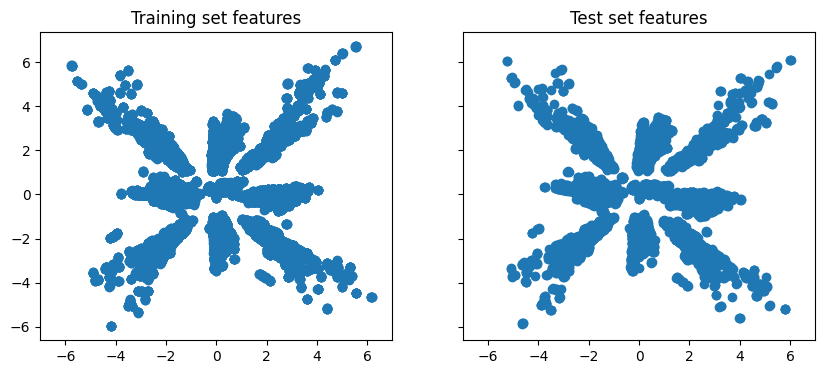

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.scatter(X_train_PCA[:, 0], X_train_PCA[:, 1])
ax1.set_xbound(-7, 7)
ax1.set_title("Training set features")
ax2.scatter(X_test_PCA[:, 0], X_test_PCA[:, 1])
ax2.set_xbound(-7, 7)
ax2.set_title("Test set features")
plt.show()

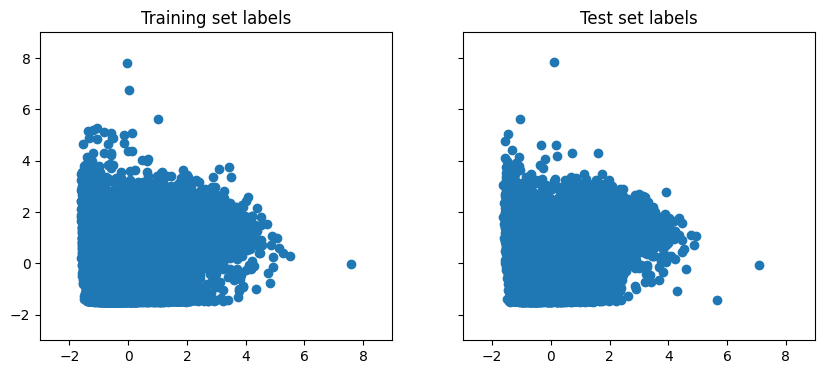

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.scatter(y_train[:, 0], y_train[:, 1])
ax1.set_xbound(-3, 9)
ax1.set_title("Training set labels")
ax2.scatter(y_test[:, 0], y_test[:, 1])
ax2.set_xbound(-3, 9)
ax2.set_ybound(-3, 9)
ax2.set_title("Test set labels")
plt.show()

# Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"Training R2 score: {lr.score(X_train, y_train):.3f}")
print(f"Test R2 score: {lr.score(X_test, y_test):.3f}")

Training R2 score: 0.733
Test R2 score: 0.729


In order to further increase the R2 score, we should use a neural network model.

# Neural network model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    keras.Input(shape=(X.shape[1],)),
    layers.Dense(16, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(2, activation="linear") # 2 outputs
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(10e-2),
    metrics=["mean_squared_error"]
)

history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.3360 - mean_squared_error: 0.3360
Epoch 2/20
1389/1389 [==============================] - 4s 3ms/step - loss: 0.2580 - mean_squared_error: 0.2580
Epoch 3/20
1389/1389 [==============================] - 2s 2ms/step - loss: 0.2576 - mean_squared_error: 0.2576
Epoch 4/20
1389/1389 [==============================] - 2s 2ms/step - loss: 0.2620 - mean_squared_error: 0.2620
Epoch 5/20
1389/1389 [==============================] - 2s 2ms/step - loss: 0.2613 - mean_squared_error: 0.2613
Epoch 6/20
1389/1389 [==============================] - 2s 2ms/step - loss: 0.2623 - mean_squared_error: 0.2623
Epoch 7/20
1389/1389 [==============================] - 4s 3ms/step - loss: 0.2646 - mean_squared_error: 0.2646
Epoch 8/20
1389/1389 [==============================] - 2s 2ms/step - loss: 0.2676 - mean_squared_error: 0.2676
Epoch 9/20
1389/1389 [==============================] - 2s 2ms/step - loss: 0.2578 - mean_squared_error:

In [ ]:
from sklearn.metrics import r2_score

yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

print(f"Training R2 score: {r2_score(y_train, yhat_train):.3f}")
print(f"Test R2 score: {r2_score(y_test, yhat_test):.3f}")

596/596 [==============================] - 1s 2ms/step
Training R2 score: 0.745
Test R2 score: 0.743


In order to increase the R2 score further, we will add more layers to the model.

In [ ]:
model2 = keras.Sequential([
    keras.Input(shape=(X.shape[1],)),
    layers.Dense(24, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(2, activation="linear")
])

model2.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(10e-3),
    metrics=["mean_squared_error"]
)

history2 = model2.fit(X_train, y_train, epochs=20)

Epoch 1/20
1389/1389 [==============================] - 4s 2ms/step - loss: 0.2158 - mean_squared_error: 0.2158
Epoch 2/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.1415 - mean_squared_error: 0.1415
Epoch 3/20
1389/1389 [==============================] - 4s 3ms/step - loss: 0.1274 - mean_squared_error: 0.1274
Epoch 4/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.1205 - mean_squared_error: 0.1205
Epoch 5/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.1145 - mean_squared_error: 0.1145
Epoch 6/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 7/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.1092 - mean_squared_error: 0.1092
Epoch 8/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 9/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.1054 - mean_squared_error:

In order to further decrease the loss, we can apply a manual learning rate decay.

In [ ]:
model2.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(10e-4),
    metrics=["mean_squared_error"]
)

history3 = model2.fit(X_train, y_train, epochs=40, initial_epoch=history2.epoch[-1])

Epoch 20/40
1389/1389 [==============================] - 4s 2ms/step - loss: 0.0801 - mean_squared_error: 0.0801
Epoch 21/40
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 22/40
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0770 - mean_squared_error: 0.0770
Epoch 23/40
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0765 - mean_squared_error: 0.0765
Epoch 24/40
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 25/40
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0759 - mean_squared_error: 0.0759
Epoch 26/40
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0755 - mean_squared_error: 0.0755
Epoch 27/40
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0756 - mean_squared_error: 0.0756
Epoch 28/40
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0753 - mean_squar

In [ ]:
model2.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(10e-5),
    metrics=["mean_squared_error"]
)

history4 = model2.fit(X_train, y_train, epochs=60, initial_epoch=history3.epoch[-1])

Epoch 40/60
1389/1389 [==============================] - 4s 2ms/step - loss: 0.0722 - mean_squared_error: 0.0722
Epoch 41/60
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0718 - mean_squared_error: 0.0718
Epoch 42/60
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0718 - mean_squared_error: 0.0718
Epoch 43/60
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 44/60
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 45/60
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 46/60
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 47/60
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 48/60
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0716 - mean_squar

Apparently, learning rate decay does not work anymore. Let us add more layers to find out whether we can decrease the MSE further.

In [ ]:
model3 = keras.Sequential([
    keras.Input(shape=(X.shape[1],)),
    layers.Dense(24, activation="relu"),
    layers.Dense(20, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(12, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(2, activation="linear")
])

model3.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(10e-3),
    metrics=["mean_squared_error"]
)

history5 = model3.fit(X_train, y_train, epochs=20)

Epoch 1/20
1389/1389 [==============================] - 5s 2ms/step - loss: 0.2630 - mean_squared_error: 0.2630
Epoch 2/20
1389/1389 [==============================] - 4s 3ms/step - loss: 0.1482 - mean_squared_error: 0.1482
Epoch 3/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.1264 - mean_squared_error: 0.1264
Epoch 4/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.1215 - mean_squared_error: 0.1215
Epoch 5/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.1151 - mean_squared_error: 0.1151
Epoch 6/20
1389/1389 [==============================] - 4s 3ms/step - loss: 0.1114 - mean_squared_error: 0.1114
Epoch 7/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 8/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 9/20
1389/1389 [==============================] - 3s 2ms/step - loss: 0.1054 - mean_squared_error:

In [ ]:
model3.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(10e-4),
    metrics=["mean_squared_error"]
)

history6 = model3.fit(X_train, y_train, epochs=40, initial_epoch=history5.epoch[-1])

Epoch 20/40
1389/1389 [==============================] - 4s 2ms/step - loss: 0.0771 - mean_squared_error: 0.0771
Epoch 21/40
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 22/40
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0742 - mean_squared_error: 0.0742
Epoch 23/40
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 24/40
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 25/40
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0733 - mean_squared_error: 0.0733
Epoch 26/40
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0731 - mean_squared_error: 0.0731
Epoch 27/40
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 28/40
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0727 - mean_squar

In [ ]:
model3.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(10e-5),
    metrics=["mean_squared_error"]
)

history7 = model3.fit(X_train, y_train, epochs=60, initial_epoch=history6.epoch[-1])

Epoch 40/60
1389/1389 [==============================] - 4s 2ms/step - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 41/60
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 42/60
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 43/60
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 44/60
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 45/60
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 46/60
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 47/60
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 48/60
1389/1389 [==============================] - 3s 2ms/step - loss: 0.0687 - mean_squar

In [ ]:
model4 = keras.Sequential([
    keras.Input(shape=(X.shape[1],)),
    layers.Dense(28, activation="relu"),
    layers.Dense(26, activation="relu"),
    layers.Dense(24, activation="relu"),
    layers.Dense(22, activation="relu"),
    layers.Dense(20, activation="relu"),
    layers.Dense(18, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(14, activation="relu"),
    layers.Dense(12, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(6, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(2, activation="linear")
])

model4.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(10e-4),
    metrics=["mean_squared_error"]
)

history8 = model4.fit(X_train, y_train, epochs=20)

Epoch 1/20
1389/1389 [==============================] - 36s 3ms/step - loss: 0.7200 - mean_squared_error: 0.7200
Epoch 2/20
1389/1389 [==============================] - 5s 3ms/step - loss: 0.4946 - mean_squared_error: 0.4946
Epoch 3/20
1389/1389 [==============================] - 5s 4ms/step - loss: 0.4485 - mean_squared_error: 0.4485
Epoch 4/20
1389/1389 [==============================] - 5s 3ms/step - loss: 0.4330 - mean_squared_error: 0.4330
Epoch 5/20
1389/1389 [==============================] - 5s 4ms/step - loss: 0.4249 - mean_squared_error: 0.4249
Epoch 6/20
1389/1389 [==============================] - 4s 3ms/step - loss: 0.2996 - mean_squared_error: 0.2996
Epoch 7/20
1389/1389 [==============================] - 4s 3ms/step - loss: 0.1405 - mean_squared_error: 0.1405
Epoch 8/20
1389/1389 [==============================] - 5s 4ms/step - loss: 0.1243 - mean_squared_error: 0.1243
Epoch 9/20
1389/1389 [==============================] - 4s 3ms/step - loss: 0.1169 - mean_squared_error

In [ ]:
model4.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(10e-5),
    metrics=["mean_squared_error"]
)

history9 = model4.fit(X_train, y_train, epochs=40, initial_epoch=history8.epoch[-1])

Epoch 20/40
1389/1389 [==============================] - 7s 3ms/step - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 21/40
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0783 - mean_squared_error: 0.0783
Epoch 22/40
1389/1389 [==============================] - 5s 4ms/step - loss: 0.0779 - mean_squared_error: 0.0779
Epoch 23/40
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 24/40
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0774 - mean_squared_error: 0.0774
Epoch 25/40
1389/1389 [==============================] - 5s 4ms/step - loss: 0.0771 - mean_squared_error: 0.0771
Epoch 26/40
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0771 - mean_squared_error: 0.0771
Epoch 27/40
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0769 - mean_squared_error: 0.0769
Epoch 28/40
1389/1389 [==============================] - 5s 3ms/step - loss: 0.0767 - mean_squar

In [ ]:
model4.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(10e-6),
    metrics=["mean_squared_error"]
)

history10 = model4.fit(X_train, y_train, epochs=60, initial_epoch=history9.epoch[-1])

Epoch 40/60
1389/1389 [==============================] - 6s 3ms/step - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 41/60
1389/1389 [==============================] - 5s 4ms/step - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 42/60
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 43/60
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 44/60
1389/1389 [==============================] - 5s 4ms/step - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 45/60
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 46/60
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 47/60
1389/1389 [==============================] - 5s 4ms/step - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 48/60
1389/1389 [==============================] - 4s 3ms/step - loss: 0.0736 - mean_squar

We have obtained the best result with model3. Let us visualize the error of model3.

# Error analysis

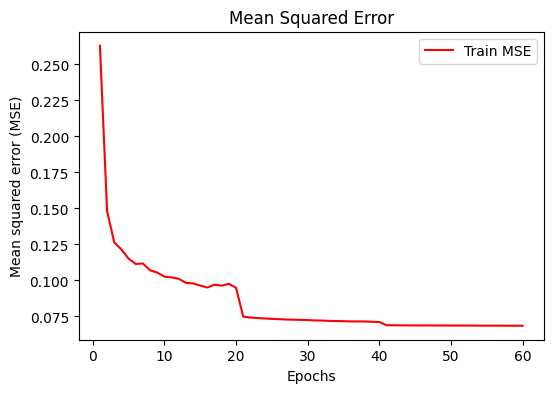

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(1, 61), history5.history["mean_squared_error"] + history6.history["mean_squared_error"][1:] + history7.history["mean_squared_error"][1:], color="red", label="Train MSE")
ax.legend(loc="upper right")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean squared error (MSE)")
ax.set_title("Mean Squared Error")
plt.show()

# Testing

In [ ]:
r2_train = r2_score(y_train, model3.predict(X_train))
r2_test = r2_score(y_test, model3.predict(X_test))

print(f"Training R2 score: {r2_train:.3f}")
print(f"Test R2 score: {r2_test:.3f}")

596/596 [==============================] - 1s 1ms/step
Training R2 score: 0.932
Test R2 score: 0.929


# Predictor API

In [ ]:
def predictor(numerical_data, categorical_data):
    # Numerical data is of shape (1, 26) with features "formFactor", "floorArea", ..., "boilerEfficiency".
    # "Infiltration", "Annual Sum Heating Degree Days", "Annual Average Dry Bulb Temperature", and "Annual Average of Global Horizontal Irradiation are excluded)
    # Categorical data is of shape (1, 3) with features "0.0", "1.0" and "2.0".

    X_numerical_scaled = scaler_X.transform(numerical_data).reshape(-1)
    X = np.concatenate([X_numerical_scaled, categorical_data.reshape(-1)], axis=0).reshape(1, -1)

    y_scaled = model3.predict(X)
    y = scaler_y.inverse_transform(y_scaled)

    # y is of shape (2, 1) with labels "heatingEndUse" and "IOD".
    return y

In [ ]:
model3.save("ubem.keras")